# Introdução a classificação de redes neurais com TensorFlow

 Nessa etapa vamos aprender como escrever redes neurais para problemas de classificação.

 A classificação é quando conseguimos diferenciar tipos diferentes de objetos.

 Alguns tipos de problemas de classificação:

 * Classificação binária
 * Multi-classificação por classes
 * Multi-classificação por rotulos

## Criando dados para visualizar e modelar


In [ ]:
from sklearn.datasets import make_circles

# Fazendo 1000 exemplos
n_samples = 1000

# Criando circulos
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Verificando os dados
x, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


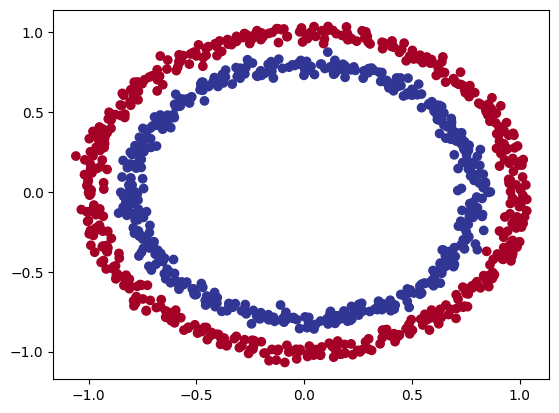

In [ ]:
# Visualização com um gráfico
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Formato dos dados de entrada e saída


In [ ]:
# Checando o 'shape' dos nossos dados
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Quantas amostras estamos trabalhando
len(x), len(y)

(1000, 1000)

In [ ]:
# Visualziando as primeiras amostras
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

from prompt_toolkit.styles.style_transformation import AdjustBrightnessStyleTransformation
## Passos da modelagem

1. Criando ou importando um modelo
2. Compilar um modelo
3. Encaixar o modelo
4. Avaliar o medelo
5. Ajustar
6. Avaliar
...

In [ ]:
import tensorflow as tf

In [ ]:
# Configurando um seed global
tf.random.set_seed(42)

# Criando o modelo usando Sequentioal API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compilando o modelo
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Encaixando nosso modelo
model_1.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 5s 4ms/step - loss: 5.6329 - accuracy: 0.5021
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 4.8962 - accuracy: 0.4986
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 4.6863 - accuracy: 0.5019
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 4.0681 - accuracy: 0.4985
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.9687 - accuracy: 0.4972


In [ ]:
# Vamos tentar melhorar o modelo por deixar ele treinar por mais tempo
model_1.fit(tf.expand_dims(x, axis=-1), y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.693464994430542, 0.5]

Como nosso modelo está tendo acurácia de ~50% ... Vamos tentar adicionar uma camada extra.

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(tf.expand_dims(x, axis=-1), y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932666301727295, 0.5]

## Melhorando nosso modelo

1. Criando um modelo - adicionando mais camadas e aumentando o número de neurônios
2. Compilando o modelo - escolher um otimizador diferente ou mudar o learning-rate
3. Encaixando o modelo - aumentar o número de cíclos (treinar por mais tempo)


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(tf.expand_dims(x, axis=-1), y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939854025840759, 0.5]

Para visualizar as predições do nosso modelo, vamos criar funções 'plot_decision_boundary()', essa função irá:
* Pegar nosso modelo, amostras x e y
* Criar um mashgrid de um x diferente
* Realizará predições com o mashgrid
* Tornará em um gráfico as predições

In [ ]:
import numpy as np

def plot_decision_boundary(model, x, y):
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing multiclass classification


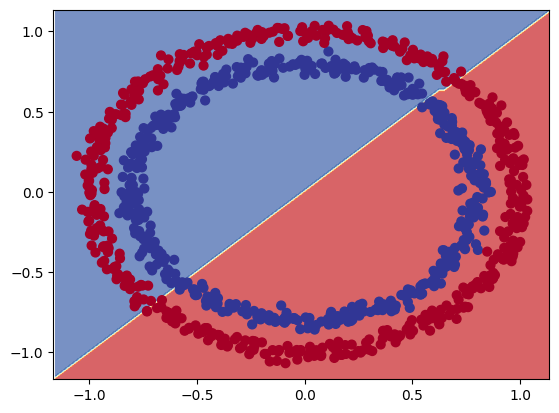

In [ ]:
plot_decision_boundary(model=model_3,
                       x=x,
                       y=y)

In [ ]:
# Vmos verificar se nosso modelo poe ser usado para um problema de regressão
tf.random.set_seed(42)

# Criando dados de regressão
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Vamos dividir em dados de treino e de teste
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Encaixar nosso modelo nos dados de regressão
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 7ms/step - loss: -6771.3799 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: -7145.0669 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: -7153.1191 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 9ms/step - loss: 532.6988 - mae: 532.6988
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 428.2533 - mae: 428.2533
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 329.1674 - mae: 329.1674
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 227.1966 - mae: 227.1966
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 121.0297 - mae: 121.0297
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 50.9235 - mae: 50.9235
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 80.1122 - mae: 80.1122
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 71.0796 - mae: 71.0796
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 47.0364 - mae: 47.0364
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 49.8827 - mae: 49.8827
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 4ms/step


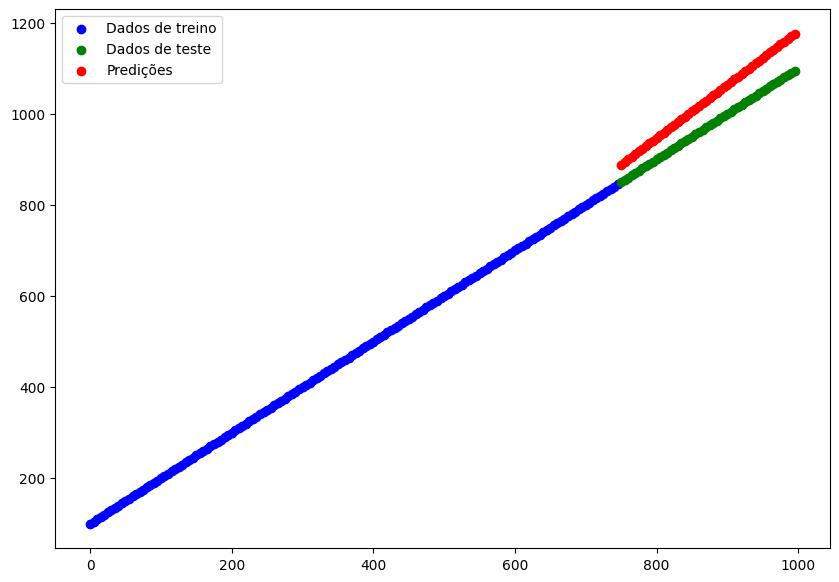

In [ ]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Dados de treino")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Dados de teste")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predições")
plt.legend();

## Não linearidade!

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

hist = model_4.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.4433 - accuracy: 0.4964
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3876 - accuracy: 0.4994
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3807 - accuracy: 0.4983
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3455 - accuracy: 0.4996
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2983 - accuracy: 0.4990
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2821 - accuracy: 0.4980
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2666 - accuracy: 0.4989
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2630 - accuracy: 0.4977
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2532 - accuracy: 0.4987
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2299 - accuracy: 0.5008
Epoch 11/

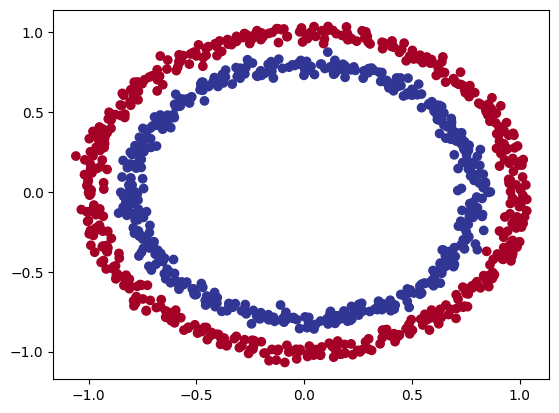

In [ ]:
# Verificando nosso dados
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing multiclass classification


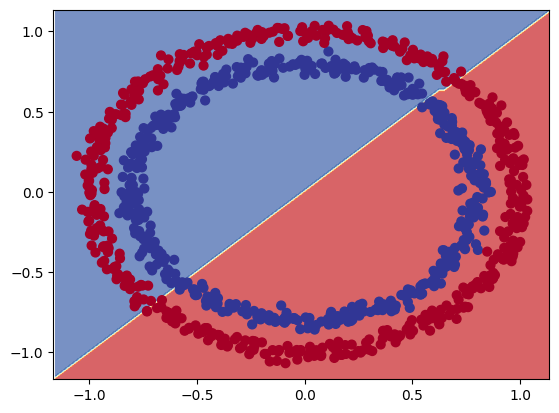

In [ ]:
plot_decision_boundary(model=model_4,
                       x=x,
                       y=y)

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

hist = model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.6092 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5827 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5544 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.5533 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5525 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5516 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5508 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5498 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5489 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5480 - accuracy: 0.4780
Epoch 11/

In [ ]:
model_5.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 4.3287 - accuracy: 0.4680


[4.328691005706787, 0.46799999475479126]

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

hist = model_6.fit(x, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 2s 4ms/step - loss: 0.6902 - accuracy: 0.5040
Epoch 2/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5030
Epoch 3/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5130
Epoch 4/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5180
Epoch 5/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5360
Epoch 6/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5350
Epoch 7/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.5530
Epoch 8/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.5560
Epoch 9/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.5560
Epoch 10/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.5570
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


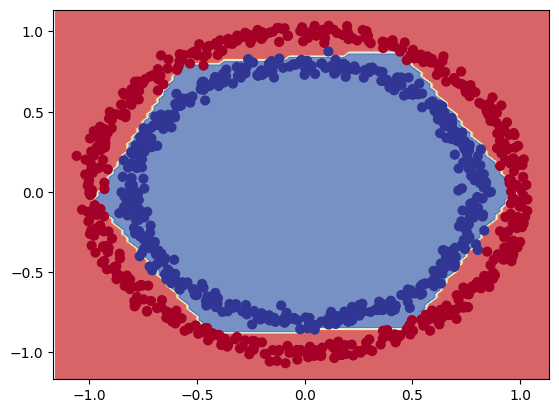

In [ ]:
plot_decision_boundary(model_6,
                       x=x,
                       y=y)

In [ ]:
model_6.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.1244 - accuracy: 0.9820


[0.12440422177314758, 0.9819999933242798]

## Avaliando e melhorando nosso modelo de classificação binária

In [ ]:
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]


In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

hist = model_7.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 4ms/step - loss: 0.6825 - accuracy: 0.5512
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.6012
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.6112
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.6200
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.6812
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.6600
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.7788
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5748 - accuracy: 0.7812
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.8037
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.8400
Epoch 11/25
25/25 [

In [ ]:
model_7.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9900


[0.07249381393194199, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


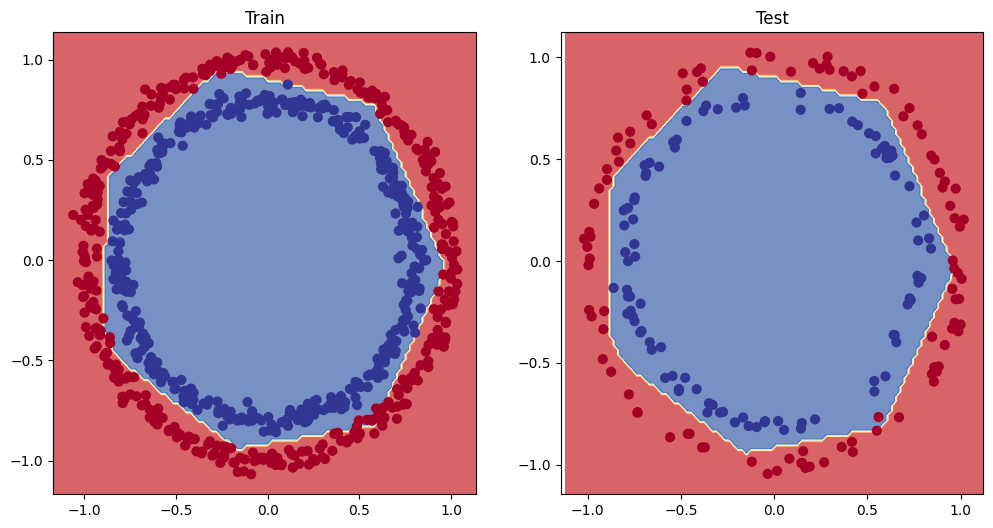

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, x=x_test, y=y_test)

## Visualizar a curva de erros

In [ ]:
pd.DataFrame(hist.history)

,loss,accuracy
0,0.682500,0.55125
1,0.672156,0.60125
2,0.664461,0.61125
3,0.654942,0.62000
4,0.644063,0.68125
5,0.626751,0.66000
6,0.600180,0.77875
7,0.574776,0.78125
8,0.527818,0.80375
9,0.466322,0.84000


Text(0.5, 1.0, 'Model_7 loss curves')

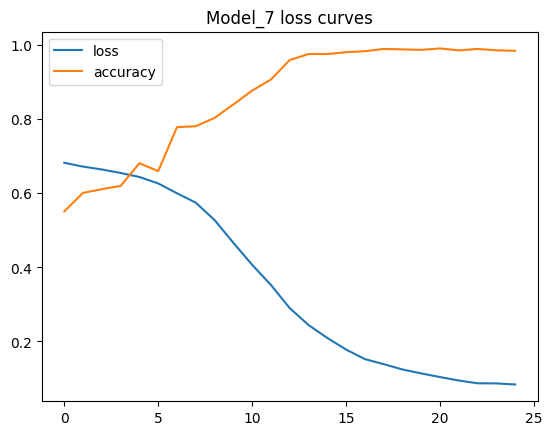

In [ ]:
pd.DataFrame(hist.history).plot()
plt.title("Model_7 loss curves")

## Achando o melhor learning rat

Para acharmos o LR ideal, vamos usar os passos aseguir:
* LR **callback** - é uma função extra adicionada enquanto o modelo está treinando.
* Outro modelo (vamos praticar criando um novo modelo).
* Vamos precisar de um gráfico de loss modificado.


In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# Criuando o learning rate callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

hist = model_8.fit(x_train, y_train, epochs=20)# callbacks=[lr_scheduler])

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.7010 - accuracy: 0.4812
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5238
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5213
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5500
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6738 - accuracy: 0.5575
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.5788
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6325 - accuracy: 0.6125
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6142 - accuracy: 0.6438
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.6775
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.6950
Epoch 11/20
25/25 [

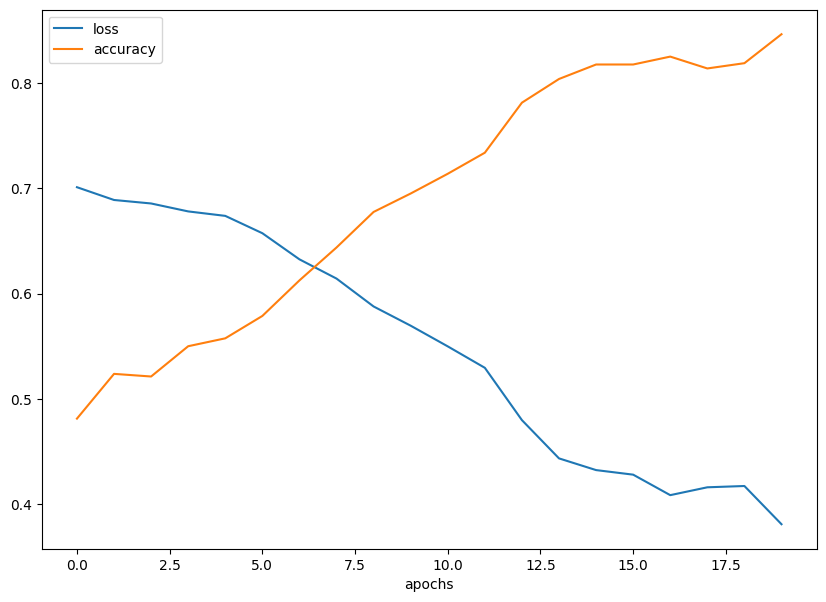

In [ ]:
pd.DataFrame(hist.history).plot(figsize=(10, 7), xlabel="apochs");

ValueError: ignored

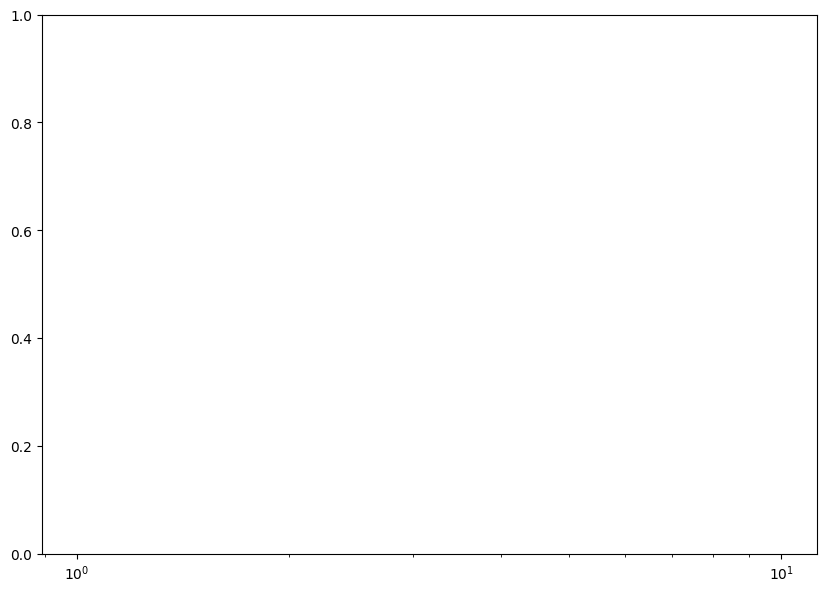

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, hist.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate x Loss")


## Mais metodos de avaliação de classificação

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit-learn)

In [ ]:
# Checando a precisão do modelo

loss, accuracy = model_8.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.8350
Model loss on the test set: 0.41345271468162537
Model accuracy on the test set: 83.50%


In [ ]:
# Criando a primeira matriz de confusão
from sklearn.metrics import confusion_matrix

y_preds = model_8.predict(x_test)

confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[68, 33],
       [ 0, 99]])

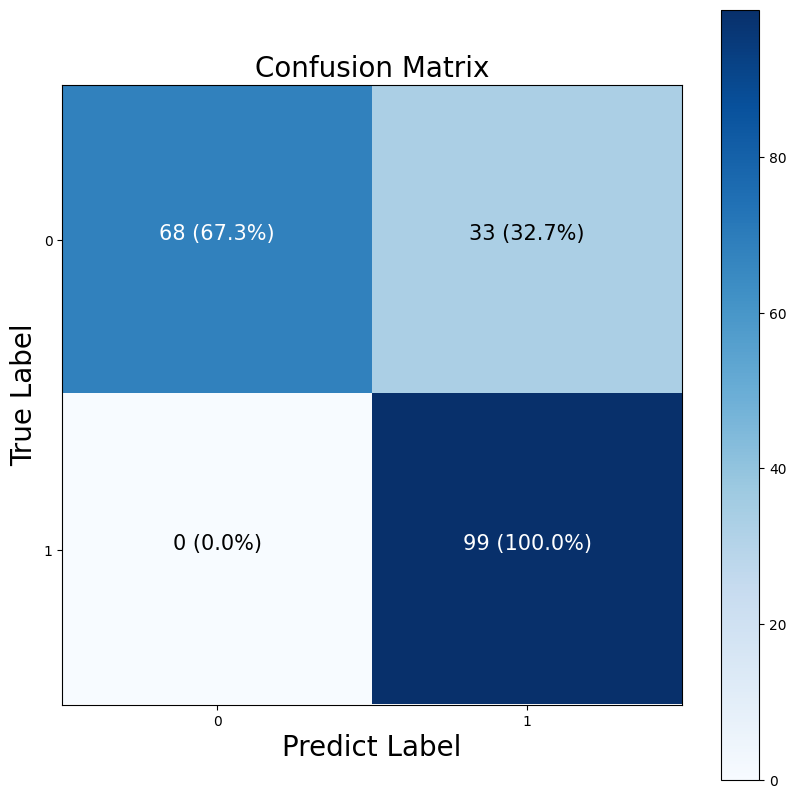

In [ ]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predict Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel="Predict Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

# Trabalhando com um exemplo maior (multiclass classification)

Quando você tem mais de uma classe como opção, é conhecido como **multi-class classification**.
* Isso significa que se tiver 3 diferentes classes ou 100+, é uma multiclasse classificação


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data[0].shape, train_labels[0].shape

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
train_labels[7]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

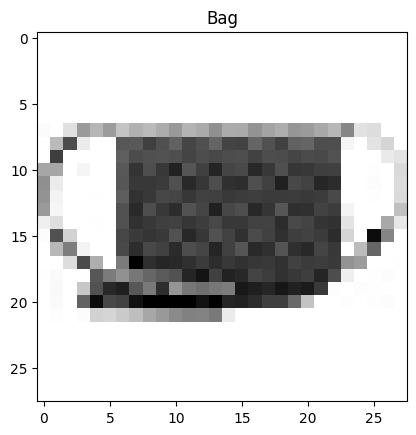

In [ ]:
index_of_choice = 1999
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


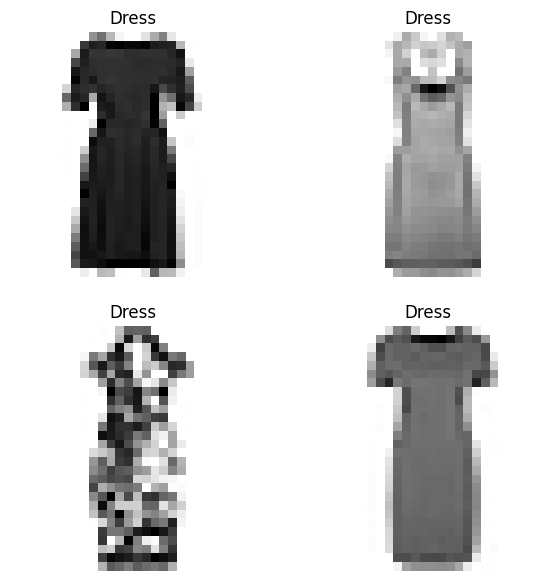

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Construindo um modelo de classificação de multiclasses

Para nosso modelo de classificação de multi-classes vamos mudar algumas coisas:
* Input shape = 28 x 28 (o formato da imagem)
* Output shape = 10 (a quantidade de classes/labels)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax (não sigmoid)


In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_hist = model_11.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 2.3559 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3025 - val_accuracy

In [ ]:
model_11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 4)                 3140      
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Checando os valores minimos e máximos dos dados de treino
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_hist = model_12.fit(train_data_norm,
             train_labels,
             epochs=10,
             validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2280 - accuracy: 0.5323 - val_loss: 0.8342 - val_accuracy: 0.6978
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7311 - accuracy: 0.7541 - val_loss: 0.6859 - val_accuracy: 0.7639
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6258 - accuracy: 0.7878 - val_loss: 0.6247 - val_accuracy: 0.7756
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5848 - accuracy: 0.7995 - val_loss: 0.5961 - val_accuracy: 0.7872
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5635 - accuracy: 0.8055 - val_loss: 0.5884 - val_accuracy: 0.7944
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5473 - accuracy: 0.8110 - val_loss: 0.5749 - val_accuracy: 0.7954
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5394 - accuracy: 0.8138 - val_loss: 0.6057 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

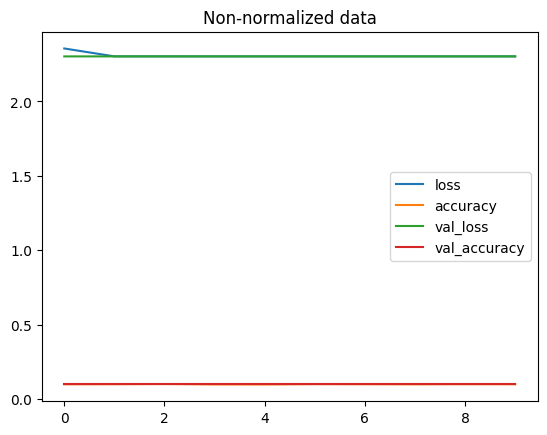

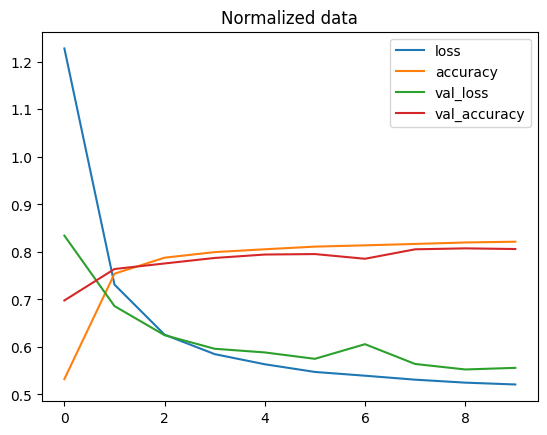

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_hist.history).plot(title="Non-normalized data")

pd.DataFrame(norm_hist.history).plot(title="Normalized data")

> **Nota:** O mesmo modelo com dados não normalizados e normalizados produz diferentes resultados.

## Achando o LR Ideal

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_hist = model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1863 - accuracy: 0.5609 - val_loss: 0.7346 - val_accuracy: 0.7529 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6790 - accuracy: 0.7667 - val_loss: 0.6776 - val_accuracy: 0.7674 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6163 - accuracy: 0.7847 - val_loss: 0.6235 - val_accuracy: 0.7764 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5883 - accuracy: 0.7934 - val_loss: 0.6070 - val_accuracy: 0.7836 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5758 - accuracy: 0.7969 - val_loss: 0.5867 - val_accuracy: 0.7932 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5664 - accuracy: 0.7995 - val_loss: 0.6008 - val_accuracy: 0.7876 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

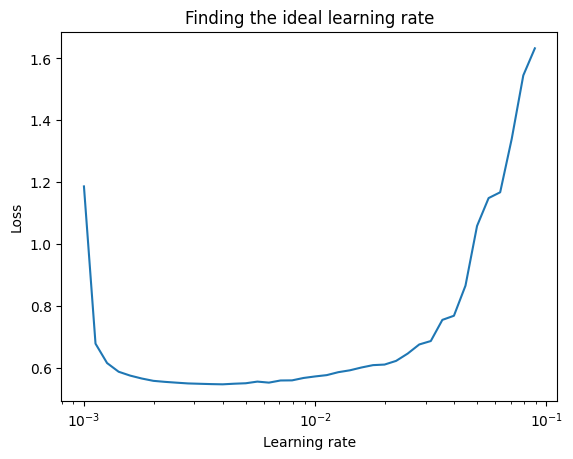

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_hist.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")


In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                 metrics=["accuracy"])

hist_14 = model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1575 - accuracy: 0.5361 - val_loss: 0.8942 - val_accuracy: 0.6564
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8273 - accuracy: 0.6811 - val_loss: 0.8014 - val_accuracy: 0.6979
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7575 - accuracy: 0.7217 - val_loss: 0.7604 - val_accuracy: 0.7306
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7109 - accuracy: 0.7506 - val_loss: 0.7297 - val_accuracy: 0.7436
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6736 - accuracy: 0.7659 - val_loss: 0.6785 - val_accuracy: 0.7654
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6425 - accuracy: 0.7775 - val_loss: 0.6682 - val_accuracy: 0.7666
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6209 - accuracy: 0.7844 - val_loss: 0.6450 - val_accuracy:

## Avaliando nosso modelo de classificação multi-classe

Para avaliar nosso modelo, podemos:
* Avaliar nosso resultado usando outras metricas de classificação (como com a matriz da confusão)
* Visualizar algumas das predições
* Melhorar os resultados (treinando por mais tempo)
* Salvar e exportar para usa-lo em uma aplicação

In [ ]:
y_probs = model_14.predict(test_data_norm)

y_probs[0]

313/313 [==============================] - 1s 2ms/step


array([2.2932732e-06, 2.2507849e-05, 7.9301250e-09, 6.5189401e-05,
       9.1601503e-20, 4.5025904e-02, 7.4210591e-05, 1.1901866e-01,
       1.2733797e-04, 8.3566386e-01], dtype=float32)

In [ ]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

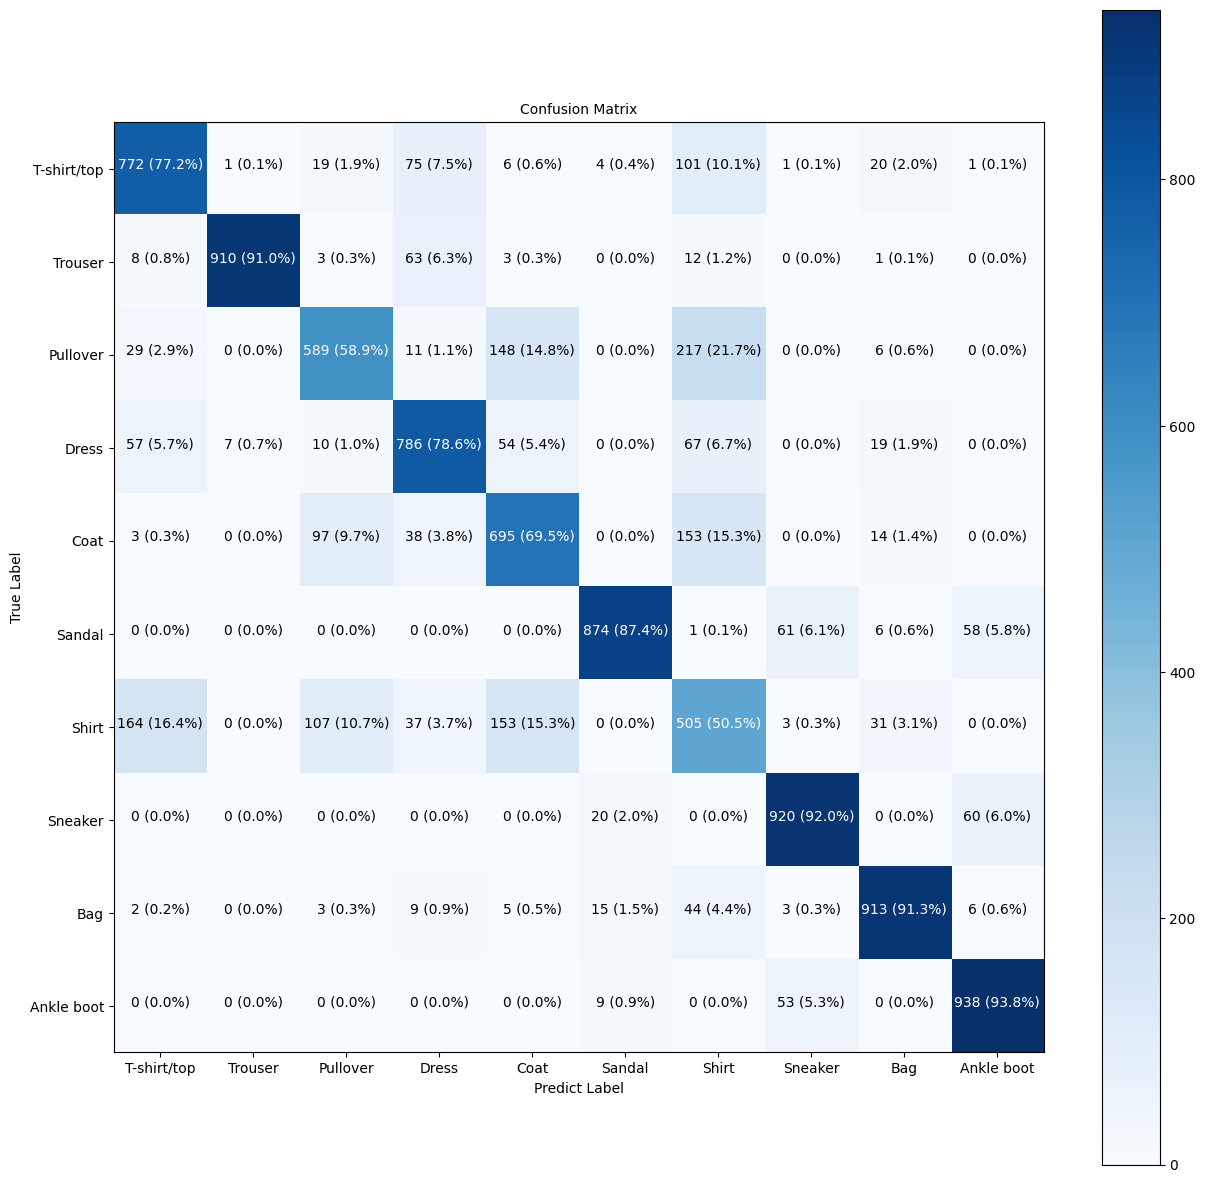

In [ ]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Quando trabalhando com imagens, ou outras formas de dados visuais, é uma boa ideia visualizar o máximo que puder os dados para o entendimento maior sobre os dados de input e output

Que tal criarmos uma função para:
* Plotar uma imagem leatória
* Fazer uma predição nessa imagem
* Avaliar a predição com a tabela verdade

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)


1/1 [==============================] - 0s 18ms/step


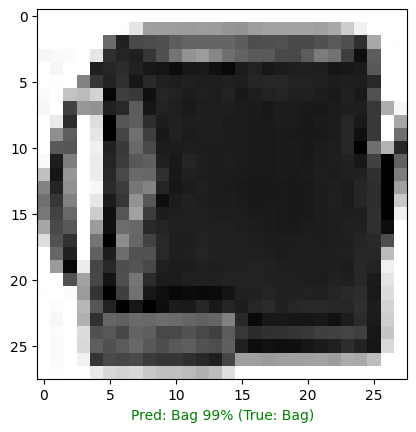

In [ ]:
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## Quais padrões meu modelo está aprendendo?

In [ ]:
# Ache a camada do nosso modelo mais recente
model_14.layers

In [ ]:
# Extrair uma camada particular
model_14.layers[1]

In [ ]:
# Pegue os padrões da nossa camada na nossa rede de neurônicos
weights, biases = model_14.layers[1].get_weights()

# Formatos
weights, weights.shape

(array([[ 1.2599639 , -0.2698297 , -0.9096112 ,  0.02922884],
        [ 0.21057379,  1.7802604 , -1.2085179 ,  0.08047031],
        [ 1.6723415 ,  2.0034053 , -1.9320548 , -0.08312827],
        ...,
        [ 0.16307487, -0.3143706 , -0.8381845 , -0.05343878],
        [-1.0321825 ,  0.07959318,  0.29669237, -0.05908643],
        [ 0.14747265,  0.96390504, -0.44800192, -0.00409757]],
       dtype=float32),
 (784, 4))

Agora vamos verificar nosso vetor de vieses

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([ 1.7490561 ,  0.36735004,  1.3409327 , -0.01200641], dtype=float32),
 (4,))

Cada um dos neurônios tem um vetor de viés. Cada um deles é pareado com uma matriz de pesos (weights matriz).

O vetor de vieses são inicializados como "zeros" (pelo menos no caso das camadas Dense do TensorFlow)

O vetor de vises direciona o quanto os padrões correspondentes da matriz de pesos vão influênciar na próxima camada.

In [ ]:
model_14.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


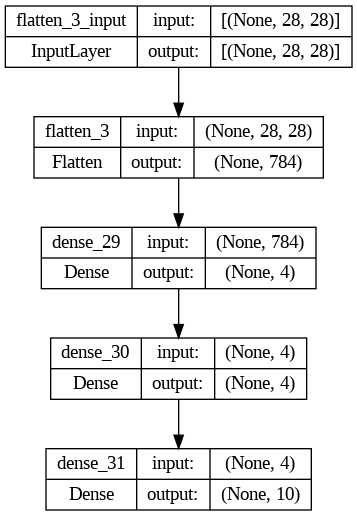

In [ ]:
# Vamos verificar um outro jeito de visualizar nosso modelo de deep learnig
from tensorflow.keras.utils import plot_model

# Ver o input e output de cada camada
plot_model(model_14, show_shapes=True)